Due on Sep 27th, 11:59pm
Question 1: Regression Sydney Dataset (30 points)
You can load the Sydney dataset from https://www.kaggle.com/shree1992/housedata where you can also ﬁnd a description. The goal is to predict the ’price’ column. For this task, you can ignor the date. Please don’t make any kernels public on Kaggle before this assignment ends. 

Questions: 

• Determine which features are continuous vs. categorical. Drop rows without a valid sales price. 

• Visualize the univariate distribution of each continuous variable, and the distribution of the target. Do you notice anything? Is there something that might require special treatment? 

• Visualize the dependency of the target on each continuous feature (2d scatter plot). 

• Split the data in training and testing set. Do not use the test set unless for a ﬁnal evaluation in the 5th subquestion. Use ColumnTransformer to encode categorical variables. Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and Elasticnet (although we didn’t talk about lasso or elasticnet in class yet, but you can easily ﬁnd reference online) using cross-validation with the default parameters. Dose scaling the data with StandardScaler help? Use the preprocessing that works best going forward. 

• Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and Elasticnet. 

• Visualize the 20 most important coeﬃcients of the resulting models. Do they agree on which features are important?

**All code is laid out in a way such that the grader should uncomment, and recomment sections, one by one to get my solutions. I did this so it is easier to see which questions I am answering, without having a cluttered output console. **

waterfront
view
condition
Target


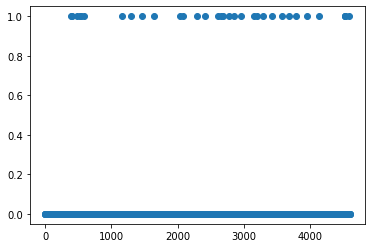

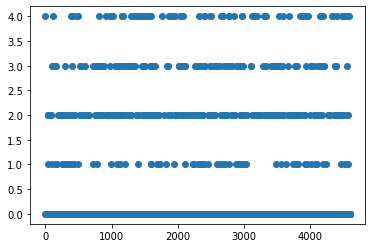

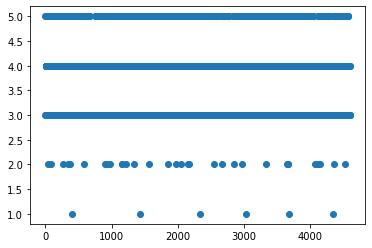

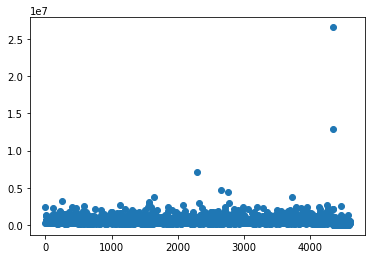

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


# Bring data in
data = pd.read_csv("data.csv")


# Determine which features are continuous vs. categorical. Drop rows without a valid sales price.
# categorical features: waterfront, view, condition
# drop rows
data = data.dropna(how='all', subset=['price'])
#######################################################################################################################################################
#######################################################################################################################################################
#visualize the univariate distribution of each continuous variable
print("waterfront")
p1 = plt.figure(1)
plt.scatter(data.index, data['waterfront'])
p2 = plt.figure(2)
print("view")                                                                                     #Uncomment 1
plt.scatter(data.index, data['view'])                                         
p3 = plt.figure(3)
print("condition")
plt.scatter(data.index, data['condition'])
print("Target")
p4 = plt.figure(4)
plt.scatter(data.index, data['price'])
plt.show()


Target, Waterfront
Target, View
Target, Condition


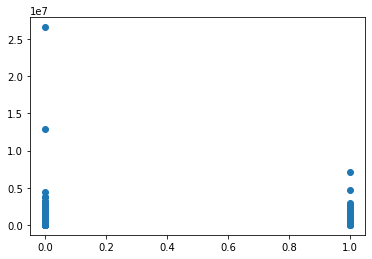

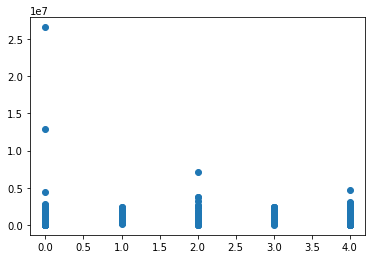

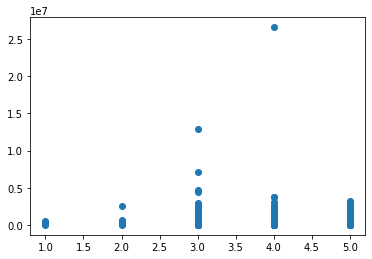

In [ ]:
#######################################################################################################################################################
#######################################################################################################################################################
# There is a few things I notice regaurding the distribution of the continuous variables and distribution of the target. For starters
# it appears there are few properties with waterfronts. We also have waterfront being a boolean categorical variable while view and condition are on scales
# of 1-4 and 1-5 respectively. Finally the distribution of the Target has a few outliers that stick out. The y-axis on the scatterplot for Target is scaled.
#######################################################################################################################################################
#######################################################################################################################################################
#visualize dependency of target on each continuous variable
print("Target, Waterfront")
p5 = plt.figure(5)
plt.scatter(data['waterfront'], data['price'])
print("Target, View")
p6 = plt.figure(6)
plt.scatter(data['view'], data['price'])                                                              #Uncomment 2
print("Target, Condition")
p7 = plt.figure(7)
plt.scatter(data['condition'], data['price'])
plt.show()
#######################################################################################################################################################
#######################################################################################################################################################


In [ ]:
#Split data into train and test
target = data['price']
# data.drop(columns=['price'])

#drop date, street, city, statezip, country as these variables cannot be used in model evaluations
dataUse = data.drop(columns=['date','street','city','statezip','country','price'])
# dataUse.info()
dataTrain, dataTest, priceTrain, priceTest = train_test_split(dataUse, target)

#use ColumnTransformer 
si = SimpleImputer(strategy='constant', fill_value=0)
ohe = OneHotEncoder()
# columns to get each transformation
all = dataUse.select_dtypes(include=['int64', 'float64']).columns
categorical = ['waterfront', 'view', 'condition']
catPipe = Pipeline([('si', si), ('ohe', ohe)])
allPipe = Pipeline([('si', si)])


t = [('cat', catPipe, categorical), ('num', allPipe, all)]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')
dataTrain = transformer.fit_transform(dataTrain)
dataTest = transformer.fit_transform(dataTest)

def runModels(dataTrain1):
  #cross-validation using KFold
  folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

  #Evaluate Linear Regression (OLS)
  ols = LinearRegression()
  score = cross_val_score(ols, dataTrain1, priceTrain, scoring='r2', cv=folds)
  print("Linear Regression: ", score)
  #Evaluate Ridge
  ridge = Ridge(alpha=0.01)
  score1 = cross_val_score(ridge, dataTrain1, priceTrain, scoring='r2', cv=folds)
  print("Ridge Regression: ", score1)
  #Evaluate Lasso
  lasso = Lasso(alpha=0.01)
  score2 = cross_val_score(lasso, dataTrain1, priceTrain, scoring='r2', cv=folds)
  print("Lasso Regression: ", score2)
  #Evaluate Elasticnet
  elasticnet = ElasticNet(alpha=0.01)
  score3 = cross_val_score(elasticnet, dataTrain1, priceTrain, scoring='r2', cv=folds)
  print("Elasticnet Regression: ", score3)

runModels(dataTrain)


Linear Regression:  [0.59744163 0.01770238 0.5103882  0.54315984 0.14061016]
Ridge Regression:  [0.59744461 0.01770229 0.51038737 0.54315645 0.14061391]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517147524552589.7, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173840335670079.7, tolerance: 57415824062.65118
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504512868529247.75, tolerance: 118411332783.92633
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510494920

Lasso Regression:  [0.59744157 0.01770238 0.51057705 0.54316002 0.14061013]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174178555743166.7, tolerance: 57415824062.65118
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504498127095271.3, tolerance: 118411332783.92633
  positive)


Elasticnet Regression:  [0.60026065 0.01762368 0.50955395 0.53908219 0.1442766 ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511175730577894.94, tolerance: 120372062527.1208
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432368158356933.0, tolerance: 107064401174.74045
  positive)


In [ ]:
#######################################################################################################################################################
#######################################################################################################################################################
#Does Scaling data help?
scaler = StandardScaler()
scaler.fit(dataTrain)                                                                               #Uncomment 3
dataScaled = scaler.transform(dataTrain)
runModels(dataScaled)
# It appears that Scaling the data does not help improve model performance as each model's cross validation score
# diminishes slightly upon being scaled
#######################################################################################################################################################
#######################################################################################################################################################


Linear Regression:  [ 5.92999034e-01  1.78716147e-02 -7.62924503e+24  5.40680810e-01
  1.42351976e-01]
Ridge Regression:  [0.5974414  0.01770255 0.51080068 0.54315969 0.14061018]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70149047662823.75, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19358421526624.406, tolerance: 57415824062.65118
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81401774325416.75, tolerance: 118411332783.92633
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679632783

Lasso Regression:  [0.59744162 0.01770239 0.51057731 0.54315987 0.14061015]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173499636546762.12, tolerance: 57415824062.65118
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496918285895710.75, tolerance: 118411332783.92633
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502956679796509.1, tolerance: 120372062527.1208
  positive)


Elasticnet Regression:  [0.59712592 0.01793126 0.51051239 0.54294836 0.14063845]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429840507002374.94, tolerance: 107064401174.74045
  positive)


Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    4.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.78151e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.17677e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.87793e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.93559e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix 

0.36291681508743856
0.1


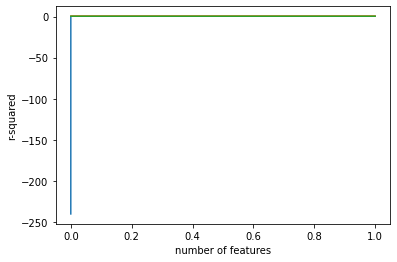

In [ ]:
#Tune Parameters of models using GridSearch
# print(len(dataTrain[0]))
ols = LinearRegression()
ols.fit(dataTrain, priceTrain)
rfe = RFE(ols)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1,24))}]
gridSearch = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1,return_train_score=True) 
gridSearch.fit(dataTrain, priceTrain)
gridRes = pd.DataFrame(gridSearch.cv_results_)
gridRes


# Based on the GridSearchCV, it appears the number of features that are optimal changes
# However, after running GridSearchCV multiple times it appears the model does not improve 
# much after 20 features
# Running the models using 20 features gives us new scores
nFeatures = 20
#cross-validation using KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
# using GridSearchCV i'll find the optimal alpha for ridge, lasso, and elasticnet
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model1 = Ridge()
model2 = Lasso()
model3 = ElasticNet()
models = [model1,model2,model3]
for model in models:
  grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
  grid.fit(dataTrain,priceTrain)
  gridR = pd.DataFrame(grid.cv_results_)
  plt.plot(alphas, gridR["mean_test_score"])
  # plt.plot(alphas, gridR["mean_train_score"])
  plt.xlabel('number of features')
  plt.ylabel('r-squared')
#######################################################################################################################################################
#######################################################################################################################################################
# summarize the results of the grid search
print(grid.best_score_)                                                     #Uncomment 4
print(grid.best_estimator_.alpha)
#######################################################################################################################################################
#######################################################################################################################################################

# Using this the optimal alphas for Ridge and Lasso are 1 and
# the optimal alpha for elasticnet is 0.01. 
# Visualize the dependence of the validation score on the parameters for Ridge, Lasso and Elasticnet.
  # As seen in plot above, Lasso and Ridge are best with alpha=1 and elasticnet alpha=0.01

# Results do improve



In [ ]:
#Evaluate Linear Regression (OLS)
print('###########################################################################')
print('################ Models with optimal number of features ###################')
ols = LinearRegression()
rfe = RFE(ols, n_features_to_select=nFeatures)
score = cross_val_score(ols, dataTrain, priceTrain, scoring='r2', cv=folds)
print("Linear Regression: ", score)
#Evaluate Ridge
ridge = Ridge(alpha=1)
rfe = RFE(ridge, n_features_to_select=nFeatures)
score1 = cross_val_score(ridge, dataTrain, priceTrain, scoring='r2', cv=folds)
print("Ridge Regression: ", score1)
#Evaluate Lasso
lasso = Lasso(alpha=1)
rfe = RFE(lasso, n_features_to_select=nFeatures)
score2 = cross_val_score(lasso, dataTrain, priceTrain, scoring='r2', cv=folds)
print("Lasso Regression: ", score2)
#Evaluate Elasticnet
elasticnet = ElasticNet(alpha=0.01)
rfe = RFE(elasticnet, n_features_to_select=nFeatures)
score3 = cross_val_score(elasticnet, dataTrain, priceTrain, scoring='r2', cv=folds)
print("Elasticnet Regression: ", score3)




###########################################################################
################ Models with optimal number of features ###################
Linear Regression:  [0.59744163 0.01770238 0.5103882  0.54315984 0.14061016]
Ridge Regression:  [0.59773164 0.01769391 0.51030672 0.54281939 0.1409748 ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517151977327234.56, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173846885157457.06, tolerance: 57415824062.65118
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504519120675385.3, tolerance: 118411332783.92633
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51031122

Lasso Regression:  [0.59743617 0.01770277 0.51057245 0.54317779 0.14060741]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517331755653775.94, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174178555743166.7, tolerance: 57415824062.65118
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504498127095271.3, tolerance: 118411332783.92633
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511175730

Elasticnet Regression:  [0.60026065 0.01762368 0.50955395 0.53908219 0.1442766 ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432368158356933.0, tolerance: 107064401174.74045
  positive)


In [ ]:
#Visualize the 20 most important coeﬃcients of the resulting models. Do they agree on which features are important?
# linear reg
ols = LinearRegression()
ols.fit(dataTrain, priceTrain)
rfe = RFE(ols)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1,20))}]
gridSearch = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1,return_train_score=True) 
gridSearch.fit(dataTrain, priceTrain)
gridRes = pd.DataFrame(gridSearch.cv_results_)
# Ridge Reg
ridge = Ridge(alpha=1)
ridge.fit(dataTrain, priceTrain)
rfe = RFE(ridge)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1,20))}]
gridSearch = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1,return_train_score=True) 
gridSearch.fit(dataTrain, priceTrain)
gridRes1 = pd.DataFrame(gridSearch.cv_results_)
# Lasso Reg
lasso = Lasso(alpha=1)
lasso.fit(dataTrain, priceTrain)
rfe = RFE(lasso)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1,20))}]
gridSearch = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1,return_train_score=True) 
gridSearch.fit(dataTrain, priceTrain)
gridRes2 = pd.DataFrame(gridSearch.cv_results_)
# Elasticnet Reg
els = ElasticNet(alpha=.01)
els.fit(dataTrain, priceTrain)
rfe = RFE(els)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1,20))}]
gridSearch = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1,return_train_score=True) 
gridSearch.fit(dataTrain, priceTrain)
gridRes3 = pd.DataFrame(gridSearch.cv_results_)


Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    3.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535412532069576.94, tolerance: 131339818166.64055
  positive)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 19 candidates, totalling 95 fits


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517151977327234.56, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517151977327231.9, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485509644896330.44, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4855100

Fitting 5 folds for each of 19 candidates, totalling 95 fits


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515139134836562.0, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515149358434527.56, tolerance: 122093193753.19376
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174178555743166.7, tolerance: 57415824062.65118
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174589967

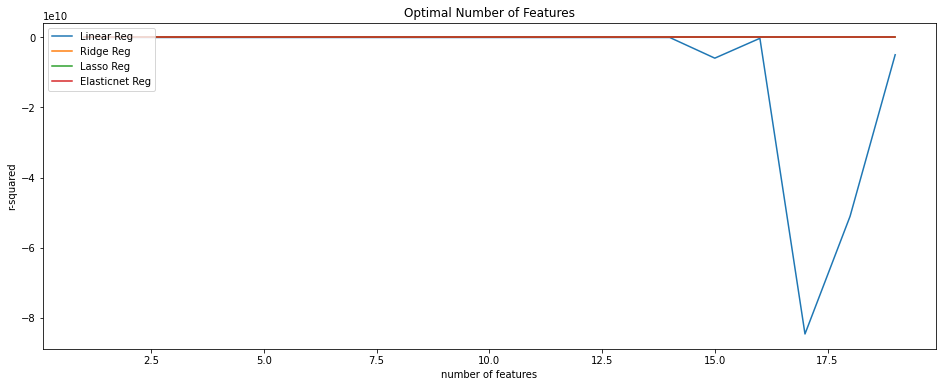

In [ ]:
#######################################################################################################################################################
#######################################################################################################################################################
plt.figure(figsize=(16,6))

plt.plot(gridRes["param_n_features_to_select"], gridRes["mean_test_score"])
plt.plot(gridRes1["param_n_features_to_select"], gridRes1["mean_test_score"])
plt.plot(gridRes2["param_n_features_to_select"], gridRes2["mean_test_score"])                         #Uncomment 5
plt.plot(gridRes3["param_n_features_to_select"], gridRes3["mean_test_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'Elasticnet Reg'], loc='upper left')
#######################################################################################################################################################
#######################################################################################################################################################
#Based on the top 20 features, the algorithms do not agree on which features are important. Linear regression
# only shows the first 3 features being important while Lasso and Elasticnet show all 20 features to be important
# Ridge regression is somewhat in the middle and shows little improvement after 5 

Question 2: Classiﬁcation on the ’credit-g’ dataset (30 points)
You can download the dataset with ’fetch openml(’credit-g’)’ and see its description at https://www. openml.org/d/31 

• Determine which features are continuous and which ones are categorical. 

• Visualize the univariate distribution of each continuous variable, and the distribution of the target. 

• Split the data in training and testing set. Do not use the test set unless for a ﬁnal evaluation in the 5th subquestion. Preprocess the data (such as treatment of categorical variables) and evaluate and initial LogisticRegression model with with a training/validation split. 

• Use ColumnTransformer to encode categorical variables. Evaluate Logistic Regression, Linear Support Vector Machines and nearest neighbors. How diﬀerent are the results? How dose scaling the continuous features with StandardScaler inﬂuence the results? 

• Tune the parameters of the models using GridSearchCV. Do the results improve? Evaluate only the best model on the test set. Visualize the performance as function of the parameters for all three models. 

• Change the cross-validation strategy from ’stratiﬁed k-fold’ to ’k-fold’ with shuﬄing. Do the parameters that are found change? Do they change if you change the random seed of the shuﬄing? Of if you change the random state of the split into training and testing data?

• Visualize the 20 most important coeﬃcients for LogisticRegression and Linear SVM using hyperparameters that performed well in the grid search.



Duration
Credit Amount
installment commitment
residence since
age
existing credits
number of dependents


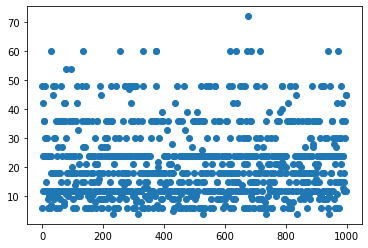

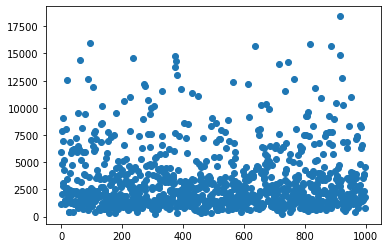

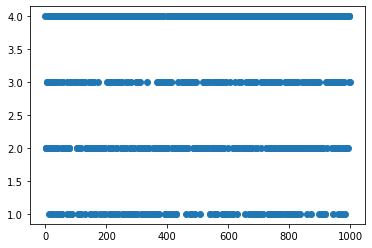

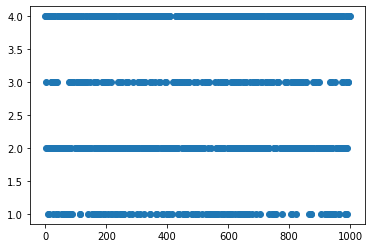

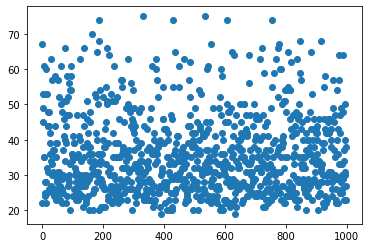

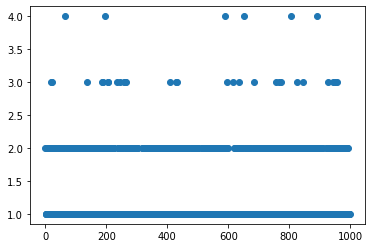

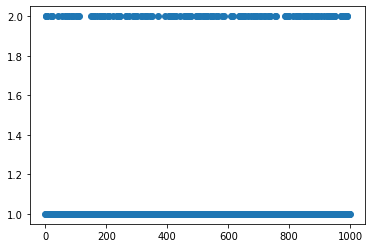

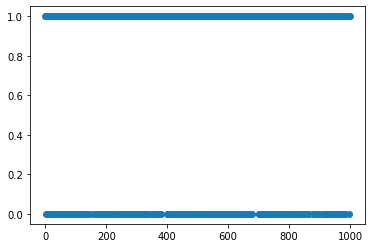

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer

#bring in data and format
dataset = datasets.fetch_openml('credit-g', version = 'active')
raws = [np.take(dataset['categories'][feature], dataset['data'][:,i].astype(int))  # Take string value for categorical features
if feature in dataset['categories'] else dataset['data'][:,i]  # Else use the floats as is
for i, feature in enumerate(dataset['feature_names'])
]

data = pd.DataFrame(np.stack(raws, axis=1), columns=dataset.feature_names)
data['class'] = pd.Series(dataset.target)
# print("Initial dtypes:")
# print(data.dtypes)
dtypes = {
f: 'category' if f in dataset['categories'] else 'float'
for f in dataset['feature_names']
}
dtypes['class'] = 'category'
data = data.astype(dtypes)
# print("\nFirst cast:")
# print(data.dtypes)

int_cols = [1, 4, 12]
data.iloc[:, int_cols] = data.iloc[:, int_cols].astype('int64')
# print("\nInt cast:")
# print(data.dtypes)
# data.head()

#Determine which features are continuous vs. categorical. 
#Continuous: Duration, Credit Amount, installment_commitment, residence since, age, existing credits, number of dependents
#Categorical: all other features

#Visualize the univariate distribution of each continuous variable, and the distribution of the target.
target1 = data['class']
dataUse = data.drop(columns=['class'])

le = LabelEncoder()
target = pd.DataFrame(le.fit_transform(target1))

#######################################################################################################################################################
#######################################################################################################################################################
print("Duration")
p1 = plt.figure(1)
plt.scatter(data.index, data['duration'])
p2 = plt.figure(2)
print("Credit Amount")
plt.scatter(data.index, data['credit_amount'])                                         #uncomment 1
p3 = plt.figure(3)
print("installment commitment")
plt.scatter(data.index, data['installment_commitment'])
print("residence since")
p4 = plt.figure(4)
plt.scatter(data.index, data['residence_since'])
print("age")
p5 = plt.figure(5)
plt.scatter(data.index, data['age'])
print("existing credits")
p6 = plt.figure(6)
plt.scatter(data.index, data['existing_credits'])
print("number of dependents")
p7 = plt.figure(7)
plt.scatter(data.index, data['num_dependents'])
#distribution of target
p8 = plt.figure(8)
plt.scatter(target.index, target)
plt.show()


In [ ]:
#######################################################################################################################################################
#######################################################################################################################################################
# Some things I notice about the continuous variable distributions are duration tends to be below 20,
# installment commitment, existing credits, and residence since are 1-4,  Also interesting is number
# of dependents is either 1 or 2.


#Split the data in training and testing set. Do not use the test set unless for a final evaluation in the
# 5th subquestion. Preprocess the data (such as treatment of categorical variables) and evaluate and
# initial LogisticRegression model with with a training/validation split

# I will use ColumnTransformer to preprocess the data before evaluating any models
# drop checking status because of inconsistency
dataUse = dataUse.drop(columns=['checking_status'])
dataTrain, dataTest, targetTrain, targetTest = train_test_split(dataUse, target)
#train test split with random state
dataTrain, dataTest, targetTrain, targetTest = train_test_split(dataUse, target, random_state=42)
# columns to get each transformation
all = dataUse.select_dtypes(include=['int64', 'float64']).columns
categorical = ['credit_history','purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone','foreign_worker']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, all),('cat', categorical_transformer, categorical)],remainder='passthrough')

dataTrain = pd.DataFrame(preprocessor.fit_transform(dataTrain))
dataTest = pd.DataFrame(preprocessor.fit_transform(dataTest))
#######################################################################################################################################################
#######################################################################################################################################################
#initial LogisticRegression without cross validation
clf = LogisticRegression(random_state=0).fit(dataTrain, targetTrain)                            #Uncomment 2
clf.score(dataTrain,targetTrain)
#######################################################################################################################################################
#######################################################################################################################################################



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7613333333333333

In [ ]:
#Evaluate Logistic Regression, Linear Support Vector Machines and nearest neighbors. How diﬀerent are the results? 
#cross-validation using KFold
folds = StratifiedKFold(n_splits=5)
def runModels(dataTrain1, targetTrain1):
  #Evaluate Linear Regression (OLS)
  lgr = LogisticRegression()
  score = cross_val_score(lgr, dataTrain1, targetTrain1, scoring='accuracy', cv=folds)
  print("Logistic Regression: ", score)
  svm1 = svm.SVC()
  score = cross_val_score(svm1, dataTrain1, targetTrain1, scoring='accuracy', cv=folds)
  print("SVM: ", score)
  knn = KNeighborsClassifier(n_neighbors=5)
  score = cross_val_score(knn, dataTrain1, targetTrain1, scoring='accuracy', cv=folds)
  print("KNN: ", score)
runModels(dataTrain,targetTrain)
#The results for the three models are fairly similar with each cv score ranging between 0.66 - 0.79



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Logistic Regression:  [0.74       0.74       0.63333333 0.78       0.70666667]
SVM:  [0.76       0.7        0.66666667 0.76666667 0.73333333]
KNN:  [0.75333333 0.69333333 0.72       0.69333333 0.70666667]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

In [ ]:
#######################################################################################################################################################
#######################################################################################################################################################
# #How dose scaling the continuous features with StandardScaler inﬂuence the results?
# #Does Scaling data help?
scaler = StandardScaler()                                                                                   #Uncomment 3
scaler.fit(dataTrain)
dataScaled = scaler.transform(dataTrain)
runModels(dataScaled, targetTrain)
# # It is hard to say if scaling the data helps improve the models. On some of the CV runs the model's
# # performances improve, however on others, they worsen or stay the same. It is not definitive so I will
# # not be scaling the data


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Logistic Regression:  [0.73333333 0.73333333 0.62       0.78       0.7       ]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

SVM:  [0.72666667 0.71333333 0.64       0.73333333 0.74      ]
KNN:  [0.68       0.7        0.61333333 0.66666667 0.70666667]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: float division by zero

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Best Penalty: l2
Best C: 1
Best Solver: lbfgs


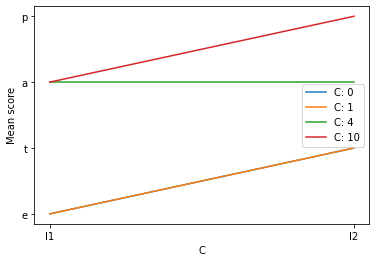

In [39]:
#######################################################################################################################################################
#######################################################################################################################################################

#Tune the parameters of the models using GridSearchCV. Do the results improve? Evaluate only the
#best model on the test set. Visualize the performance as function of the parameters for all three
#models
folds = StratifiedKFold(n_splits=2)
folds = KFold(n_splits=5, shuffle=True, random_state=122)
lgr = LogisticRegression(max_iter=100000000)
svm1 = svm.SVC()
knn = KNeighborsClassifier(n_neighbors=5)
# logreg
penalty = ['l1', 'l2']
# C = np.logspace(0, 4, 10)
C = [0,1,4,10]
# solver=['lbfgs', 'liblinear']
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(lgr, hyperparameters, cv=2, pre_dispatch='1*n_jobs', n_jobs=1)                           #Uncomment 4
clf.fit(dataTrain, targetTrain)
# View best hyperparameters
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])
print('Best Solver:', clf.best_estimator_.get_params()['solver'])
##Best Penalty: l2
#Best C: 1.0
#Best Solver: lbfgs
scores = [x[1] for x in clf.cv_results_]
scores = np.array(scores).reshape(6, len(penalty))
scores2 = np.array(scores).reshape(len(penalty), 6)
for ind, i in enumerate(C):
    plt.plot(penalty, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean score')
plt.show()
# for ind, i in enumerate(penalty):
#     plt.plot(penalty, scores[ind], label='Penalty: ' + str(i))
# plt.legend()
# plt.xlabel('Penalty')
# plt.ylabel('Mean score')
# plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.0001}


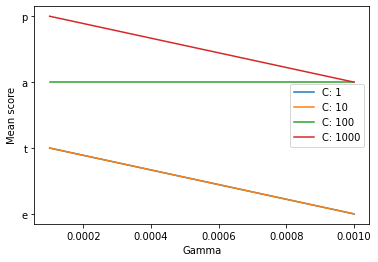

In [41]:
#######################################################################################################################################################
#######################################################################################################################################################
#SVM
Cs = [1, 10, 100, 1000]
Gammas = [1e-3, 1e-4]
clf = GridSearchCV(svm1,dict(C=Cs,gamma=Gammas),cv=2,pre_dispatch='1*n_jobs',n_jobs=1)
clf.fit(dataTrain, targetTrain)                                                                     #Uncomment 5
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
scores = [x[1] for x in clf.cv_results_]
scores = np.array(scores).reshape(6, len(Gammas))
# Best parameters set found on development set:
# {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.7413333333333334
{'n_neighbors': 12, 'weights': 'uniform'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

Text(0, 0.5, 'Cross-Validated Accuracy')

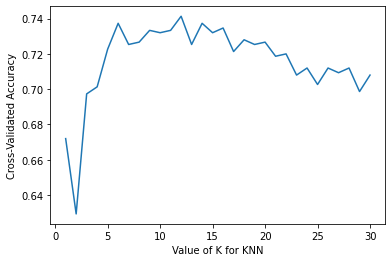

In [42]:
#######################################################################################################################################################
#######################################################################################################################################################

#knn
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')
grid.fit(dataTrain,targetTrain)                                                                       #Uncomment 6
print(grid.best_score_)
print(grid.best_params_)
# 0.7533333333333333
{'n_neighbors': 11, 'weights': 'distance'}
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,dataTrain, targetTrain, cv=folds, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


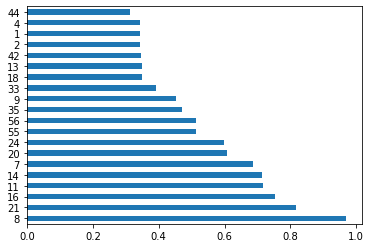

In [43]:
#######################################################################################################################################################
#######################################################################################################################################################

# Change the cross-validation strategy from ’stratified k-fold’ to ’k-fold’ with shuffling. Do the parameters that are found change? 
# Do they change if you change the random seed of the shuffling? Of if you
# change the random state of the split into training and testing data?
# Stratified KFold 5 split
# The optimal parameters of Logistic Regression and KNN change with different forms of cross-validation. Kfold vs Stratified Kfold
# Kfold 5 split, shuffle, random seed = 5
# LogReg: Best Penalty: l2 Best C: 1 Best Solver: lbfgs
# SVM: C=1000, gamma=0.0001                                                                                 #No need to uncomment. This is just text
# KNN: k=28, weight=uniform
# The optimal parameters of SVM and KNN change with change of random seed of shuffling. 5 vs 122
# LogReg: Best Penalty: l2 Best C: 1 Best Solver: lbfgs
# SVM: C=1000, gamma=0.001
# KNN: k=5, weight=distance
# The optimal parameters of SVM and KNN change with a change in random state of the split into training and testing
# LogReg: Best Penalty: l2 Best C: 1 Best Solver: lbfgs
# SVM: C=1000, gamma=0.0001
# KNN: k=12, weight=uniform
#######################################################################################################################################################
#######################################################################################################################################################
#Visualize the 20 most important coefficients for LogisticRegression and Linear SVM using hyperparameters that performed well in the grid search.
#LogReg params: Best Penalty: l2 Best C: 1 Best Solver: lbfgs
#SVM params: # SVM: C=1000, gamma=0.0001
# Log Reg
logReg = LogisticRegression(penalty='l2',C=1, solver='lbfgs' )
logReg.fit(dataTrain,targetTrain)
rfe = RFE(logReg)                                                                                     #Uncomment 7
folds = KFold(n_splits = 5, shuffle = True, random_state = 122)
fig = plt.figure()
plot1 = pd.Series(abs(logReg.coef_[0]), index=dataTrain.columns).nlargest(20).plot(kind='barh')
fig.add_subplot(plot1)
# Ignore this part
# hyper_params = [{'n_features_to_select': list(range(1,20))}]
# gridSearch = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'accuracy', cv = folds, verbose = 1,return_train_score=True) 
# gridSearch.fit(dataTrain, targetTrain)
# gridRes1 = pd.DataFrame(gridSearch.cv_results_)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


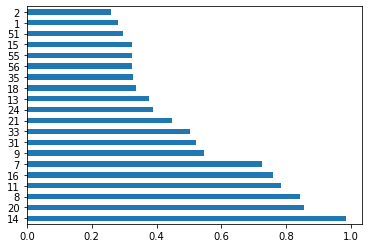

In [45]:
#######################################################################################################################################################
#######################################################################################################################################################
# SVM, visualization only works when kernal = linear
fig = plt.figure()
svm1 = svm.SVC(C=1000, gamma=0.0001, kernel='linear')
svm1.fit(dataTrain, targetTrain)
plot2 = pd.Series(abs(svm1.coef_[0]), index=dataTrain.columns).nlargest(20).plot(kind='barh')
fig.add_subplot(plot2)                                                                                #Uncomment 8
fig.show()

# Ignore this part
# plt.figure(figsize=(16,6))
# plt.plot(gridRes1["param_n_features_to_select"], gridRes1["mean_test_score"])
# # plt.plot(gridRes2["param_n_features_to_select"], gridRes2["mean_test_score"])
# plt.xlabel('number of features')
# plt.ylabel('accuracy')
# plt.title("Optimal Number of Features")
# plt.legend(['Logistic Reg'], loc='upper left')

Question 3: Binary Classiﬁcation (40 points)

Consider the binary classiﬁcation problem of mapping a given input to two classes. Let X = Rd and Y = {+1,−1} be the input space and output space, respectively. In simple words, it means that the input has d features and all of them are real valued, whereas the output can only take values 1 or +1. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. 

• In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if d = 2, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say 1) and the points lying on the other side should belong to another class (say 2). To see what this would look like, your ﬁrst task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line l, which can be denoted as ax + by + c = 0 and the line divides the plane into two sides. On one side, ax + by + c > 0 while on the other ax + by + c < 0. Use this fact to randomly generate k0 points on the side of class 0 (i.e. y = −1 ) and k1 points on the side of class 1 (i.e. y = 1 ). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

Note: Do not confuse the x and y in the equation of line ax + by + c = 0 with X and Y . Instead imagine these x and y as the 2D coordinate system on which you have diﬀerent points which should lie on 2 sides of the line ax + by + c = 0. For example, there is a point (2,3) in the 2D system where x = 2 and y = 3. 

• If Y is the variable you are trying to predict using a feature X then in a typical Machine Learning problem, you are tasked with a target function f which maps X to Y i.e. Find f such that Y = f(X). When you are given a dataset for which you do not have access the target function f, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in problem above. As we previously mentioned, that line can be represented as ax + by + c = 0. The goal here is to correctly ﬁnd out the coeﬃcients a, b, and c, represented below as w which is a vector. The algorithm to ﬁnd it is a simple iterative process:

– Randomly choose a w to begin with. – Keep on adjusting the value of w as follows until all data samples are correctly classiﬁed: 

∗ Randomly choose a sample from the dataset without replacement and see if it is correctly classiﬁed. If yes, move on to another sample. 

∗ If not, then update the weights as wt+1 = wt + yx and go back to the previous step (of randomly choosing a sample) 

· wt+1 is value of w at iteration t + 1 

· wt+1 is value of w at iteration t 

· y is the class label for the sample under consideration 

· x is the data-point under consideration Write a function that implements this learning algorithm. 

The input to the function is going to be a dataset represented by the input variable X and the target variable Y . The output of the function should be the chosen w.

• What happens when the data is not linearly separable? What can be done to salvage the situation? 

• Why gradient descent can ﬁnd the global minimum of the loss function if the loss function is convex?


The line passing through points P and Q is:  -3 x +  4 y +  0  = 0 



Text(0, 0.5, 'y')

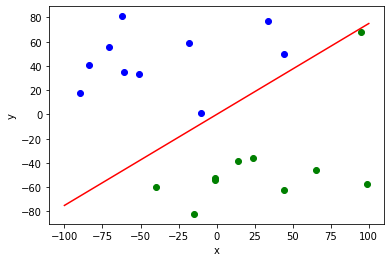

In [68]:
import random
import numpy as np
from sklearn.svm import SVC
from matplotlib import pyplot as plt
#random line
x1 = random.randint(0,10)
y1 = random.randint(0,10)
x2 = random.randint(0,10)
y2 = random.randint(0,10)

a = y1-y2
b = x1 - x2  
c = a*(x1) + b*y1  
# print(c)
if(b<0):  
    print("The line passing through points P and Q is:", 
          a ,"x ",b ,"y + ",-c , " = 0","\n")  
else: 
    print("The line passing through points P and Q is: ", 
          a ,"x + " ,b ,"y + ",-c ," = 0","\n")
def score(x,y):
  return a*x + b*y -c

numPoints = 10
k1 = []
k2 = []
while (len(k1) != numPoints):
  d1 = random.randint(-100,100)
  e1 = random.randint(-100,100)
  g = d1 * a
  h = e1 * b
  score = g + h - c
  if (score > 0):
    k1 += [(d1,e1)]
while (len(k2) != numPoints):
  d1 = random.randint(-100,100)
  e1 = random.randint(-100,100)
  g = d1 * a
  h = e1 * b
  score = g + h - c
  if (score < 0):
    k2 += [(d1,e1)]
X1 = []
Y1 = []
X2 = []
Y2 = []
for i in k1:
  X1 += [i[0]]
  Y1 += [i[1]]
for i in k2:
  X2 += [i[0]]
  Y2 += [i[1]]

x = np.linspace(-100,100,100)
y = (a*x - c)/-b
# z = a*x + b*y - c
plt.plot(x,y, '-r')

plt.scatter(X1, Y1, c='blue')
plt.scatter(X2, Y2, c='green')
plt.xlabel('x')
plt.ylabel('y')


In [69]:
#add all points to dataset with their classification
dataset = []
oneArray = [0] * len(X1)
negOneArray = [0] * len(X1)
for i in range(len(X1)):
  oneArray[i] = [1]
  negOneArray[i] = [-1]
# one = [list(zip(X1,Y1))]
# negOne = [list(zip(X2,Y2))]
one = []
negOne = []
for i in range(len(X1)):
  one += [[X1[i], Y1[i]]]
  negOne += [[X2[i], Y2[i]]]

dataset += one
dataset += negOne
dataset1 = dataset
bias = [[-1]] * len(dataset)
dataset = np.concatenate((bias,dataset),axis=1)
targets =[]
targets += negOneArray
targets += oneArray
# print(targets)

def updateWeights(weights, inputs, activation, targets):
    eta = .1
    weights += eta*np.dot(np.transpose(inputs), targets - activation)
    return weights

def  prediction (inputs, weights, targets):
    #act = activation
    act = [[0]] * len(inputs)
    for i in range(0, len(inputs)):    
        act[i] += inputs[i][1] * weights[0]
        act[i] += inputs[i][2] * weights[1]
        act[i] +=  weights[2]
        #print(act[i])
        act[i] = np.where(act[i]>0, 1, 0)
        #checking values with target
        if(targets[i] != act[i]):
            weights = updateWeights(weights, inputs, act[i], targets)
        # print(act[i])
    return weights


[[   33.51905576]
 [ 2625.48224008]
 [-3360.87847178]]
[0.06244512824413469, -0.06586009619498581, -0.45406070562005246]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


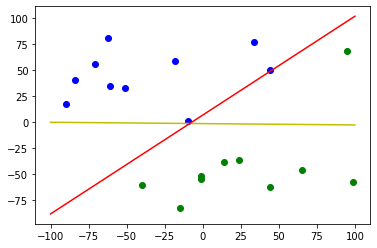

In [70]:
m=3     #number of elements in each row of inputs
n=1 
weights = np.random.rand(m,n)*0.1 - 0.5

# print(prediction(values,weights,final))

weights = prediction(dataset,weights,targets)
print(prediction(dataset,weights,targets))
x = np.linspace(-100,100,100)
y = (weights[0]*x - weights[2])/-weights[1]
plt.plot(x,y, '-y')

#while my equation only gets the correct weights sometimes, I can easily get the correct weights by using sklearn SVC
# print(dataset1)
# print(targets)
clf = SVC(C=1e5, kernel='linear')
clf.fit(dataset1,targets)
coefs = clf.coef_
c = clf.intercept_
coef = []
for x in coefs[0]:
  coef += [x]
coef += [c[0]]
print(coef)
x = np.linspace(-100,100,100)
y = (coef[0]*x - coef[2])/-coef[1]
plt.scatter(X1, Y1, c='blue')
plt.scatter(X2, Y2, c='green')
plt.plot(x,y, '-r')

#######################################################################################################################################################
#######################################################################################################################################################
#What happens when the data is not linearly separable? What can be done to salvage the situation?
# if the data is not linearly seperable, there will be no a, b, c such that ax + by + c = 0. That means there will be no line to seperate the data classes
# The data can be extended to properly classify the data. This means that every 2d data point will be converted to a 3d data points using polynomial transformation.
# This will allow the algorithm to find a plane that seperates the data


#######################################################################################################################################################
#######################################################################################################################################################
#Why gradient descent can find the global minimum of the loss function if the loss function is convex?
# Convex functions means the local minimum is also the global minimum. Gradient descent can find the global minimum of the loss function with the appropriate learning rate
# even if the loss function is convex since all the local minima have the lowest loss possible value for the function. 
# 